In [1]:
import sys
sys.path.append("/Users/santy/Google Drive/github projects/questaal-reader")
from questaal_reader import *
from pymatgen.electronic_structure.plotter import BSPlotter as bp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from matplotlib import gridspec
import sys

from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
# from adjustText import adjust_text
import re
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage
from tabulate import tabulate
from scipy.interpolate import Rbf
from pysciplottk.easyplotter import EasyPlotter



ry2ev = 13.605662285137

In [2]:
from src.band_structures import plot_Li,plot_density

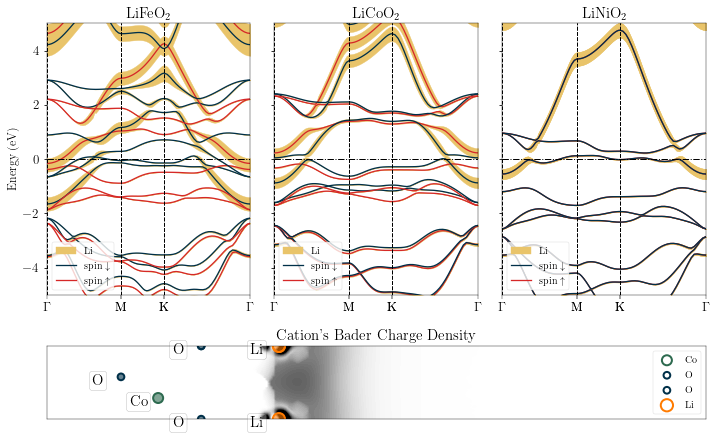

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]
params = {'backend': 'pdf',
           'axes.labelsize': 10*2,
           'font.size': 15,
           'axes.titlesize':15,
           'legend.fontsize': 10,
           'xtick.labelsize': 8*2,
           'ytick.labelsize': 8*2,
           'text.usetex': True,
           'figure.figsize': fig_size}
plt.rcParams.update(params)


fig = plt.figure(figsize=fig_size,facecolor="w")
gs = gridspec.GridSpec(2, 3, height_ratios=[1, .27]) 
ax = plt.subplot(gs[0,0])
ax.set_title("LiFeO$_2$")
plot_Li(ax,folder="data/lifeo2/")
ax.set_ylabel("Energy (eV)",fontsize=12)

ax = plt.subplot(gs[0,1])
ax.set_title("LiCoO$_2$")
plot_Li(ax,folder="data/licoo2/")
ax.set_yticklabels("")

ax = plt.subplot(gs[0,2])
ax.set_title("LiNiO$_2$")
plot_Li(ax,folder="data/linio2/")
ax.set_yticklabels("")

ax = plt.subplot(gs[1,:])
plot_density(ax)
ax.set_title("Cation's Bader Charge Density")
plt.tight_layout()
plt.savefig("figs/surface_bands_compare.pdf",dpi=300)
plt.show()

In [2]:
import re
def get_eps(fname):
    def norm(x):
        return x / np.trapz(x)
    def spectrum(E,osc,sigma,x):
        gE=[]
        for Ei in x:
            tot=0
            for Ej,os in zip(E,osc):
                tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
            gE.append(tot)
        return gE
    E=np.loadtxt(fname,comments="#").T
    r=spectrum(E[0],E[2],sigma=.1,x=E[0])
    return [E[0],r]

In [4]:
bse_xy_wlocal=get_eps("data/BSE/BSE_withlocal_xy")
# bse_z_wlocal=get_eps("data/BSE/BSE_withlocal_z")
rpa_xy_wlocal=get_eps("data/BSE/RPA_withlocal_xy")
# rpa_z_wlocal=get_eps("data/BSE/RPA_withlocal_z")

bse_xy_wolocal=get_eps("data/BSE/BSE_withoutlocal_xy")
# bse_z_wolocal=get_eps("data/BSE/BSE_withoutlocal_z")
rpa_xy_wolocal=get_eps("data/BSE/RPA_withoutlocal_xy")
# rpa_z_wolocal=get_eps("data/BSE/RPA_withoutlocal_z")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plotter = EasyPlotter('figs/Optics.pdf','latex,revtex')
fig = plotter.normal_figure()
ax = fig.add_subplot(111)
data=bse_xy_wlocal
ax.plot(data[0],data[1],c="#e63946",linestyle="-",label="BSE$_{xy}$")
ax.fill_between(data[0],data[1], color='#e63946',alpha=.14)
data=rpa_xy_wlocal
ax.plot(data[0],data[1],c='#1d3557',linestyle="-",label="RPA$_{xy}$")
ax.fill_between(data[0],data[1], color='#1d3557',alpha=.14)
ax.set_xlim([0,11])
ax.set_ylim([0,None])
ax.axvline(3.7625,c="k",ls="--",lw=.8)
ax.set_ylabel("Im($\epsilon$)")
ax.set_xlabel("Energy (eV)")
ax.legend()
plotter.save()

<Figure size 432x288 with 0 Axes>